# Lecture 05: Histograms & Density Plots

## Section 1: Introduction to Distributions

### What is a distribution?
A distribution describes how the values of a variable are spread out. It tells us how frequently each value (or range of values) occurs.

For example:
- What ages are most common among Titanic passengers?
- What grades do students in a class most frequently earn?

Visualizing distributions helps us:
- Understand central tendencies (e.g. average, median)
- Detect skewness
- Spot outliers and patterns

We'll begin with two fundamental techniques:
- **Histograms** — break data into bins and count occurrences
- **Kernel Density Estimators (KDEs)** — smooth curves representing the data distribution

## Section 2: Histograms

A histogram is one of the most common tools to visualize a distribution.

### How it works:
- The data range is divided into intervals called **bins**.
- For each bin, we count how many data points fall inside it.
- The result is a bar chart where the bar height shows the count.

### Key points:
- Histograms **depend on user-defined parameters**:
  - **Bin width**: Too small = noisy, Too large = oversmoothed
  - **Starting point of bins**: Can visually shift where modes appear
- Histograms are **easy to read** and **easily understood**

### Example Dataset:
We'll use a dataset of Titanic passengers' ages to explore histograms.


In [94]:
library(ggplot2)
titanic_all <- read.csv("https://www.ics.uci.edu/~algol/teaching/informatics143w2021/titanic.csv")
summary(titanic_all$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   21.00   28.00   30.40   39.00   71.00     557 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 557 rows containing non-finite outside the scale range (`stat_bin()`)."


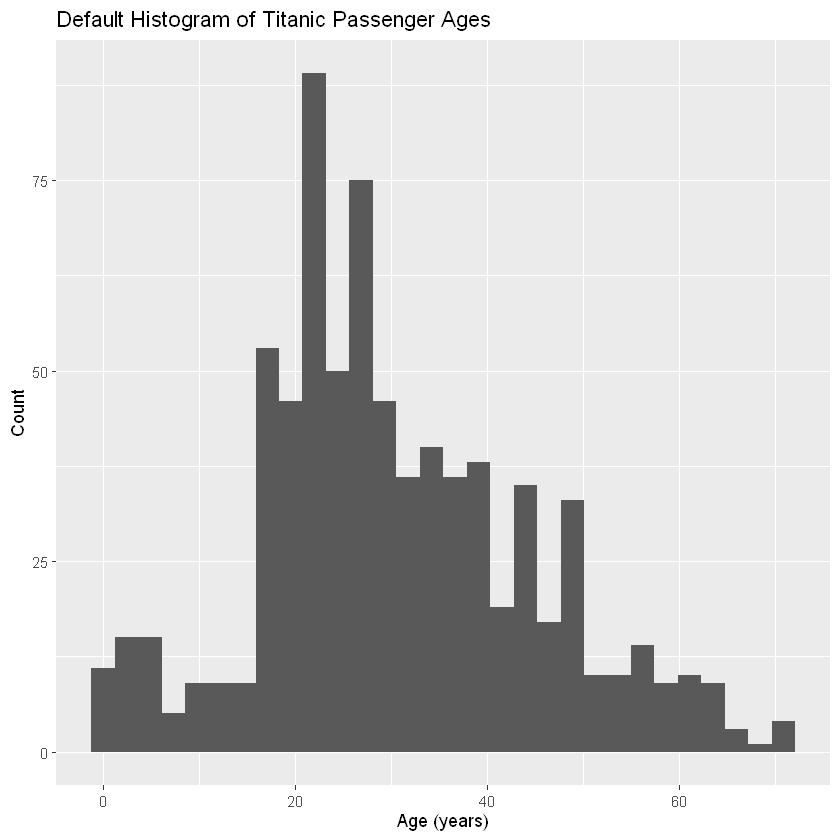

In [95]:
ggplot(titanic_all, aes(x = age)) +
  geom_histogram() +
  labs(title = "Default Histogram of Titanic Passenger Ages", x = "Age (years)", y = "Count")

### What's wrong with this?

- The bin width was automatically chosen.
- We don't know where the bins start or end.
- The shape of the histogram can change significantly with different settings.

Let's fix that by explicitly defining the bin edges.


Warning message:
"Removed 557 rows containing non-finite outside the scale range (`stat_bin()`)."


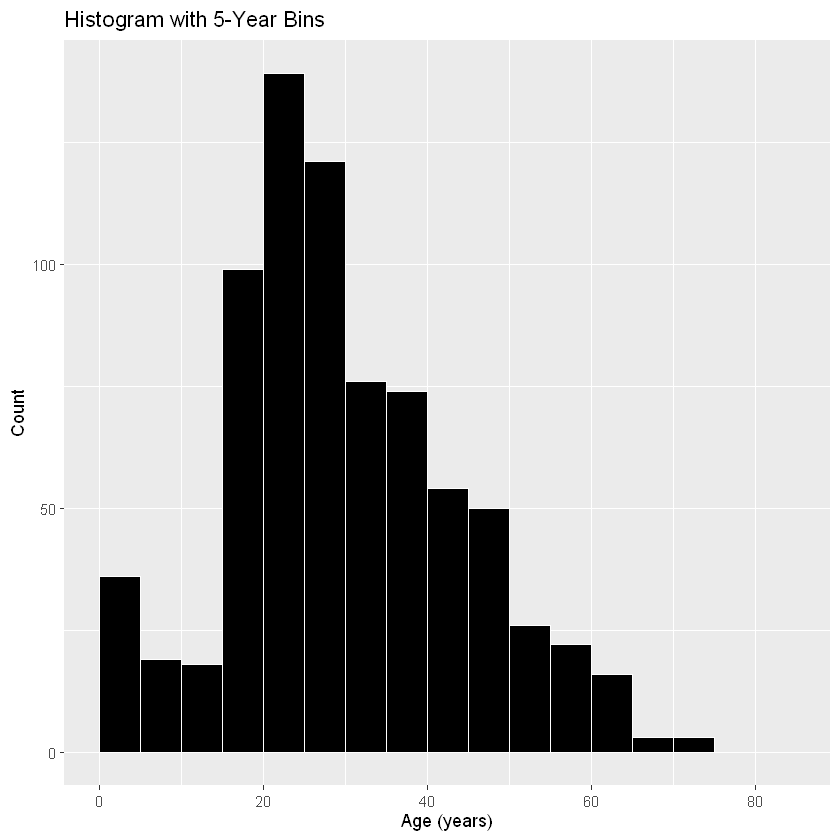

In [96]:
ggplot(titanic_all, aes(x = age)) +
  geom_histogram(
    breaks = seq(0, 85, by = 5),
    fill = "black",
    color = "white"
  ) +
  labs(title = "Histogram with 5-Year Bins", x = "Age (years)", y = "Count")


## Section 3: Kernel Density Estimators (KDEs)

Histograms give us a blocky approximation of a distribution — but what if we want something smoother?

### Kernel Density Estimation (KDE):
- KDE replaces each data point with a smooth **kernel function** (usually Gaussian).
- All kernels are summed to produce a smooth curve.
- The **bandwidth** controls the width of the kernel (how far it spreads):
  - Small bandwidth: follows the data closely, but may be noisy
  - Large bandwidth: smooths over noise, but may miss details

### Key Properties:
- **No bins** are required — KDE is continuous.
- The curve is normalized to integrate to 1 (i.e., it's a density).
- Like histograms, KDEs depend on user-chosen parameters (bandwidth).

### Visual Pitfall:
Different bandwidths can completely change the apparent shape of the distribution.


Warning message:
"Removed 557 rows containing non-finite outside the scale range
(`stat_density()`)."


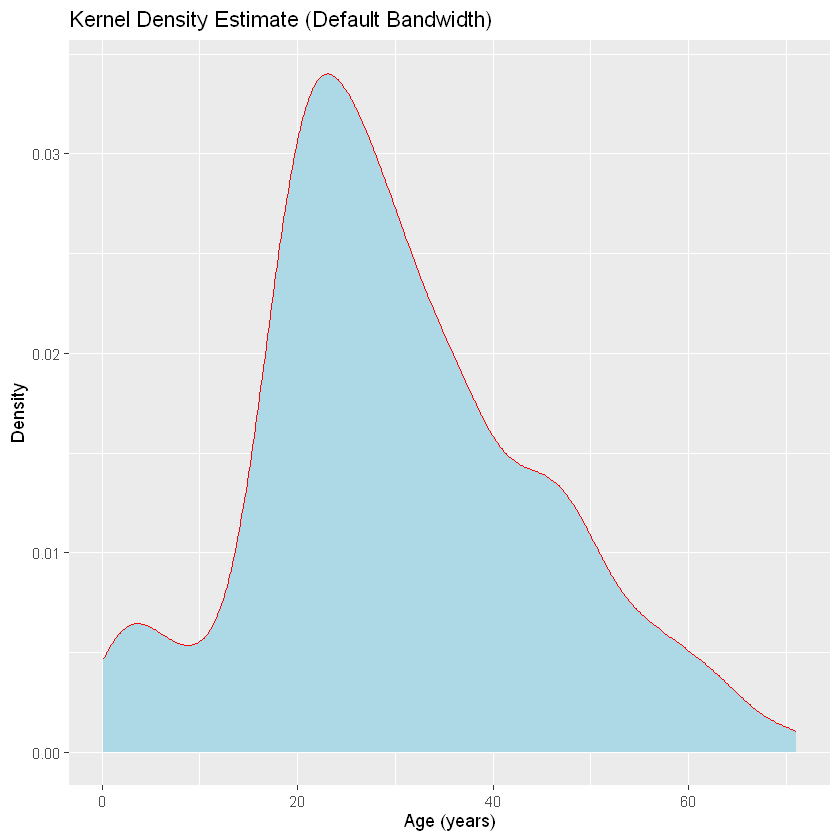

In [97]:
ggplot(titanic_all, aes(x = age)) +
  geom_density(fill = "lightblue", color = "red") +
  labs(title = "Kernel Density Estimate (Default Bandwidth)", x = "Age (years)", y = "Density")

Warning message:
"Removed 557 rows containing non-finite outside the scale range
(`stat_density()`)."


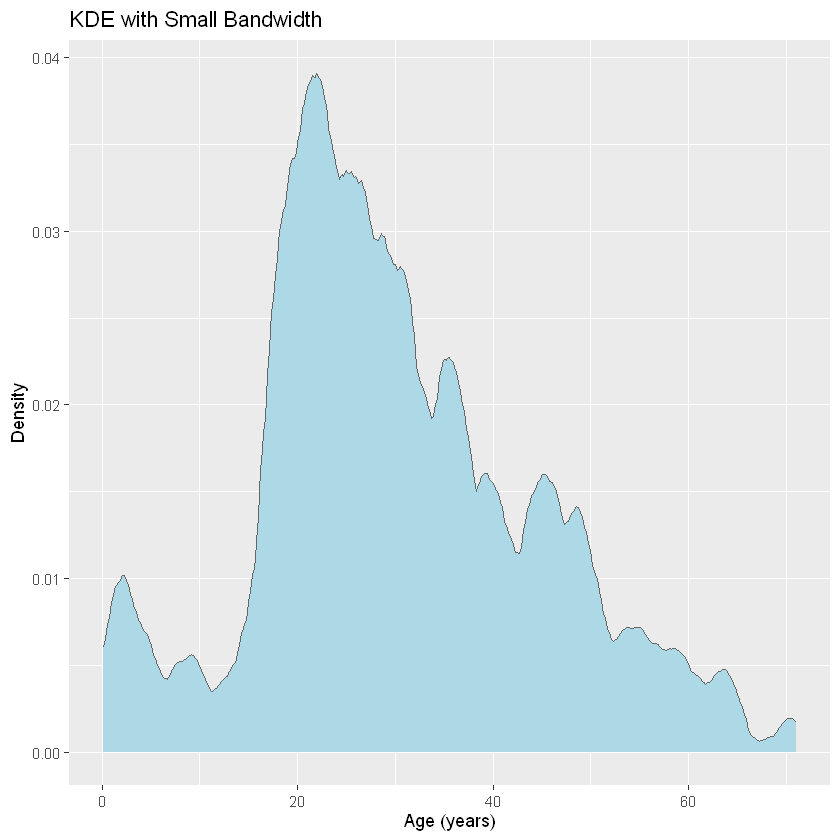

In [98]:
ggplot(titanic_all, aes(x = age)) +
  geom_density(bw = 1, kernel = "epanechnikov", fill = "lightblue", color = "gray40") +
  labs(title = "KDE with Small Bandwidth", x = "Age (years)", y = "Density")

Warning message:
"Removed 557 rows containing non-finite outside the scale range
(`stat_density()`)."


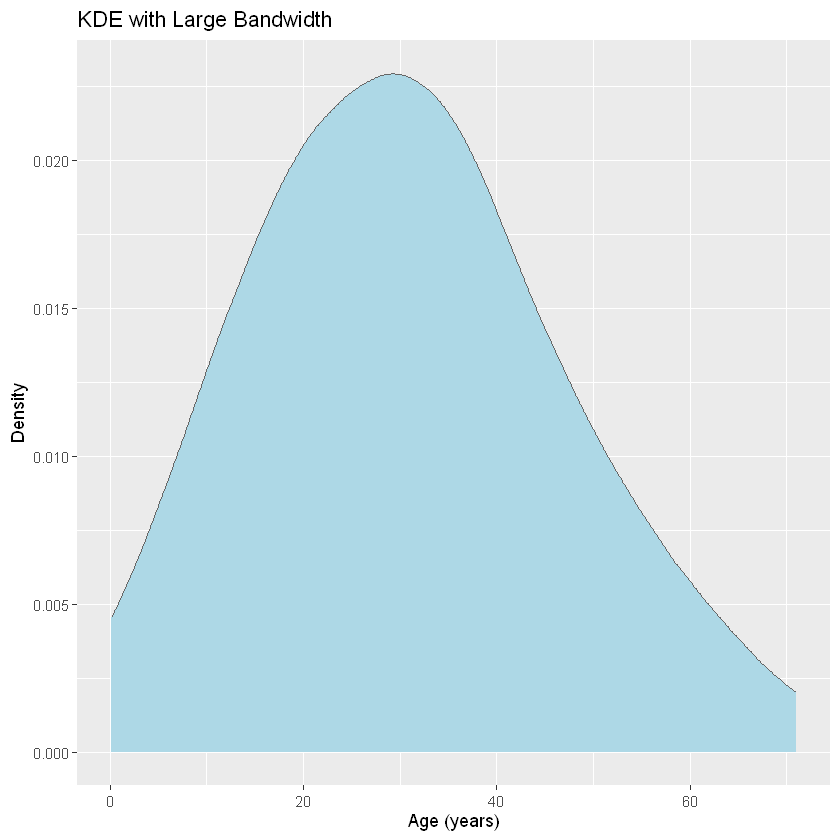

In [99]:
ggplot(titanic_all, aes(x = age)) +
  geom_density(bw = 10, kernel = "epanechnikov", fill = "lightblue", color = "gray40") +
  labs(title = "KDE with Large Bandwidth", x = "Age (years)", y = "Density")

## Section 4: Comparing Histograms and KDEs

Both histograms and KDEs visualize distributions — but they emphasize different things.

| Aspect          | Histogram                          | KDE                                            |
|----------------|-------------------------------------|------------------------------------------------|
| Style          | Discrete bars (binned)              | Smooth curve (continuous)                      |
| Flexibility    | Better for count comparison         | Better for general shape distribution          |
| Pitfalls       | Binning edges                       | Bandwidth may over/under smooth                |

### Visual Example:
Let’s plot both on the same data to see the tradeoffs.


Warning message:
"Removed 557 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 557 rows containing non-finite outside the scale range
(`stat_density()`)."


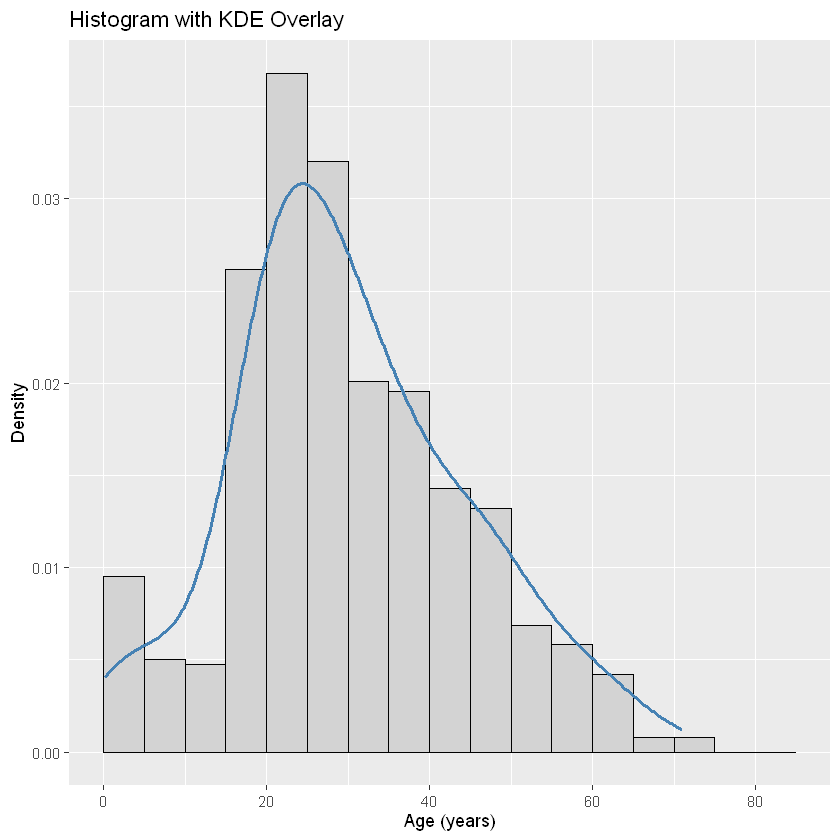

In [100]:
ggplot(titanic_all, aes(x = age)) +
  geom_histogram(
    breaks = seq(0, 85, by = 5),
    aes(y = ..density..),
    fill = "lightgray",
    color = "black"
  ) +
  geom_density(bw = 5, color = "steelblue", size = 1.1) +
  labs(title = "Histogram with KDE Overlay", x = "Age (years)", y = "Density")


- Both plots show a similar overall shape.
- KDE is smoother and easier to interpret visually.
- Histogram shows exact counts per bin, which can be more intuitive in some contexts.

When presenting to non-technical audiences, use histograms.
When exploring the data or comparing subtle differences, KDE is often more insightful.


## Section 5: Mirror Plots

Mirror plots are used to compare **two distributions** side by side by reflecting one along a horizontal axis.

### Why use them?
- Make it easier to compare shape, center, and spread between two groups
- Common in demography, but also useful for comparing age, income, grades, etc.

### How it works:
- Plot group A with positive y-values
- Plot group B with negative y-values (flipped)
- You can mirror:
  - Histograms
  - KDEs


Warning message:
"Removed 383 rows containing non-finite outside the scale range
(`stat_density()`)."
Warning message:
"Removed 174 rows containing non-finite outside the scale range
(`stat_density()`)."


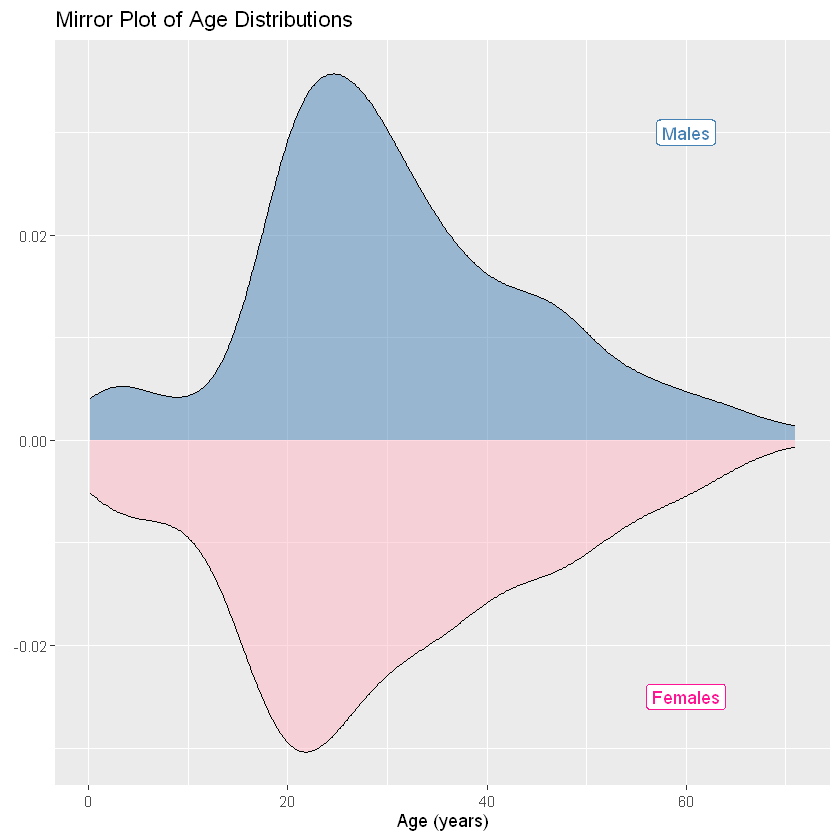

In [101]:
male_ages <- data.frame(age = titanic_all$age[titanic_all$sex == "male"])
female_ages <- data.frame(age = titanic_all$age[titanic_all$sex == "female"])

ggplot() +
  geom_density(data = male_ages, aes(x = age, y = ..density..), 
               fill = "steelblue", alpha = 0.5) +
  geom_density(data = female_ages, aes(x = age, y = -..density..), 
               fill = "lightpink", alpha = 0.5) +
  # Simple way to add labels directly onto the plot 
  geom_label(aes(x = 60, y = 0.03, label = "Males"), color = "steelblue") +
  geom_label(aes(x = 60, y = -0.025, label = "Females"), color = "deeppink") +
  labs(title = "Mirror Plot of Age Distributions", x = "Age (years)", y = NULL)


Warning message:
"Removed 383 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 174 rows containing non-finite outside the scale range (`stat_bin()`)."


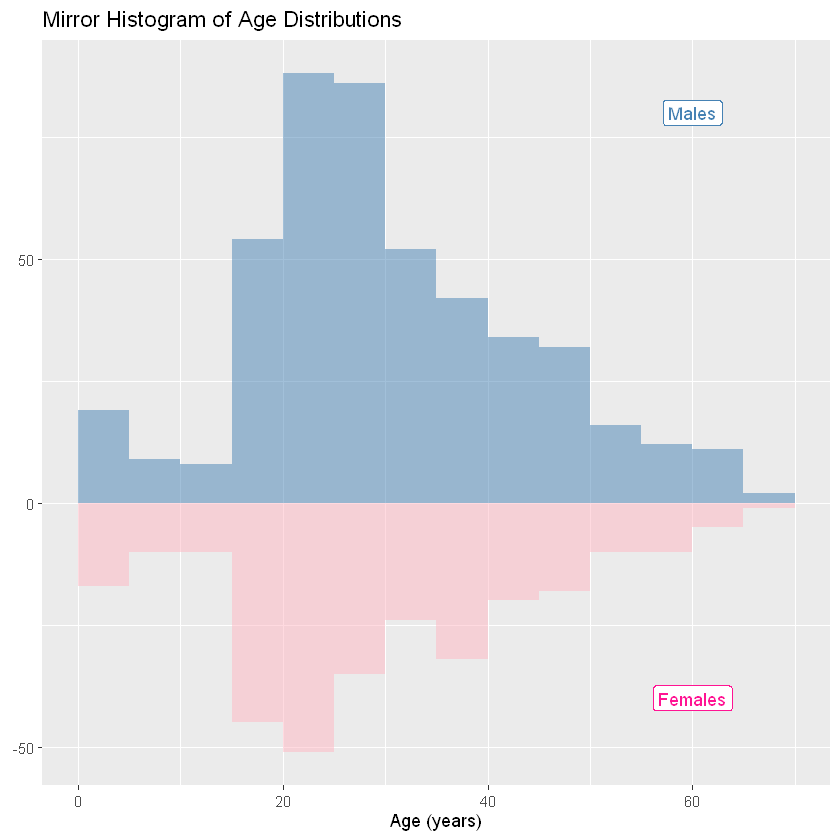

In [102]:
breaks <- seq(0, max(titanic_all$age, na.rm = TRUE), by = 5)

ggplot() +
  geom_histogram(data = male_ages, aes(x = age, y = ..count..), 
                 breaks = breaks, fill = "steelblue", alpha = 0.5) +
  geom_histogram(data = female_ages, aes(x = age, y = -..count..), 
                 breaks = breaks, fill = "lightpink", alpha = 0.5) +
  geom_label(aes(x = 60, y = 80, label = "Males"), color = "steelblue") +
  geom_label(aes(x = 60, y = -40, label = "Females"), color = "deeppink") +
  labs(title = "Mirror Histogram of Age Distributions", x = "Age (years)", y = NULL)


### Notes:
- Mirror plots are visually powerful for side-by-side comparisons.
- You can apply this technique to any pair of categories.
- Choose consistent bins or smoothing across both groups to ensure a fair comparison.


# Lecture 06: ECDFs and Q-Q Plots
## Section 1: Why Move Beyond Histograms?

Histograms and density plots are powerful, but they rely on **user-chosen parameters**:
- Bin width (histograms)
- Bandwidth (KDEs)
- Starting points (bins)

These choices can change the shape of the plot and affect your interpretation.

### What if we want to:
- Avoid making arbitrary decisions?
- Visualize the **entire dataset** as faithfully as possible?
- Compare our data directly to a **theoretical distribution**?

That’s where **ECDFs** and **Q-Q plots** come in.


## Section 2: Empirical Cumulative Distribution Functions (ECDFs)

An **ECDF** shows how data accumulates over a variable.

### Key Properties:
- X-axis: the value itself (e.g., a student's grade)
- Y-axis: the **proportion** of data points ≤ that value
- It's a **step function** that jumps by 1/n at each data point
- No bins or smoothing — all data is preserved

### Benefits:
- Parameter-free: no bin size or bandwidth needed
- More faithful to the data than histograms or KDEs
- Can reveal medians, quartiles, skewness, and outliers

We'll use a synthetic student grade dataset again for consistency.


In [103]:
grades <- round(rnorm(50, mean = 75, sd = 15) / 5) * 5
grades <- pmin(pmax(grades, 0), 100) 

student_df <- data.frame(
  grade = grades,
  rank = rank(grades, ties.method = "random")
)


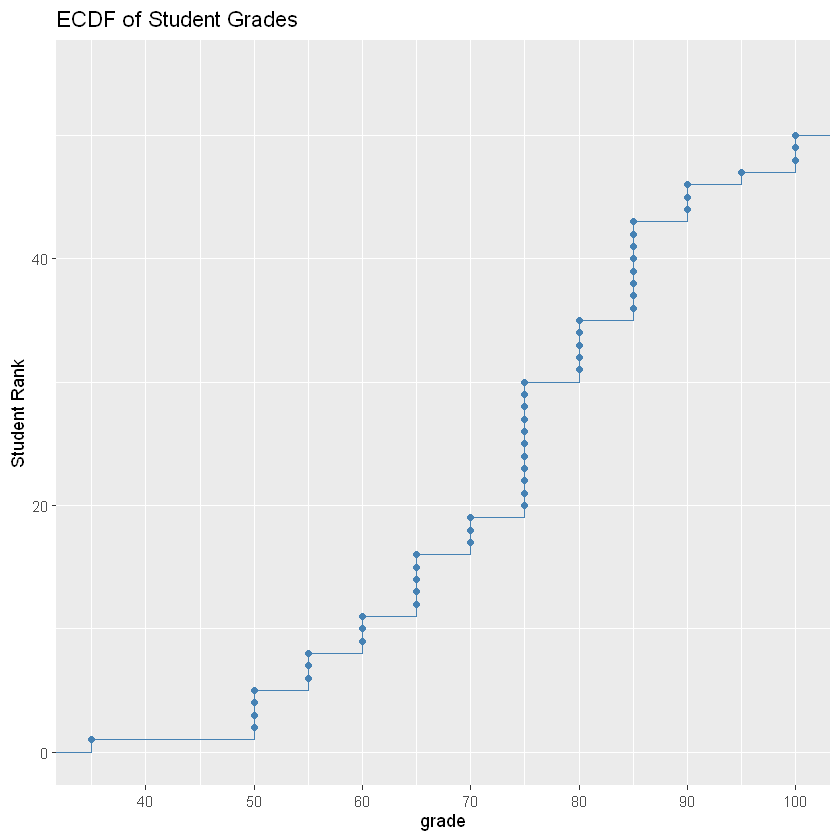

In [104]:
ggplot(student_df, aes(x = grade, y = 50 * ..y..)) +
  stat_ecdf(geom = "step", color = "steelblue") +
  geom_point(aes(y = rank), color = "steelblue") +
  scale_x_continuous(breaks = seq(0, 100, 10)) +
  scale_y_continuous(name = "Student Rank", limits = c(0, 55)) +
  labs(title = "ECDF of Student Grades")


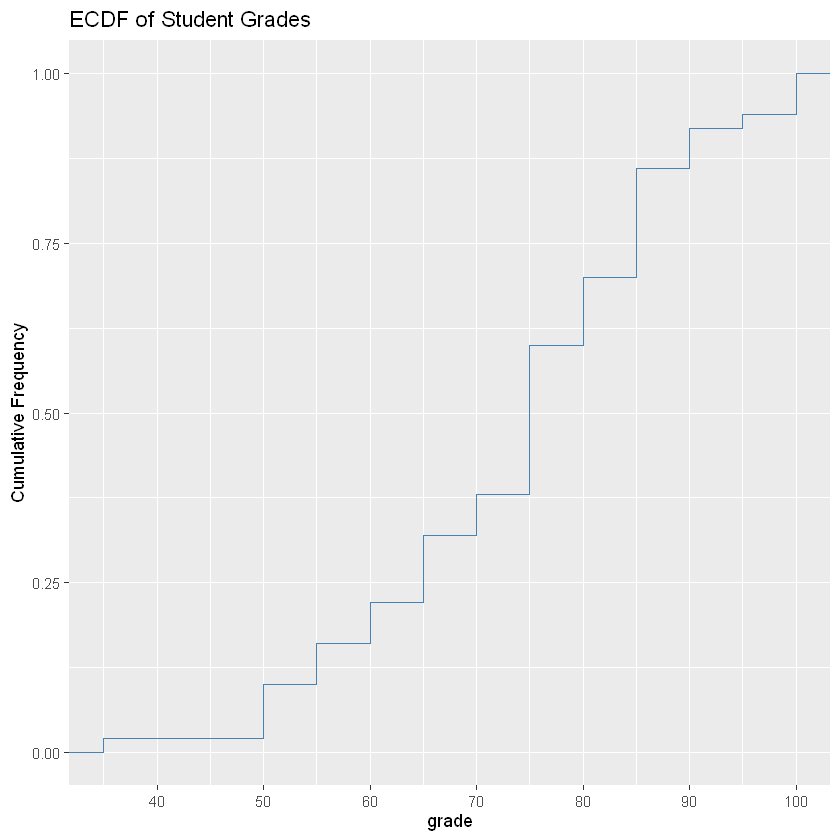

In [105]:
ggplot(student_df, aes(x = grade)) +
  stat_ecdf(geom = "step", color = "steelblue") +
  scale_x_continuous(breaks = seq(0, 100, 10)) +
  scale_y_continuous(name = "Cumulative Frequency", limits = c(0, 1)) +
  labs(title = "ECDF of Student Grades")


### Interpreting ECDFs:
- The **median** is the x-value at y = 0.5
- The **25th and 75th percentiles** are at y = 0.25 and y = 0.75
- A **steeper slope** means values are tightly packed
- A **flatter segment** means few values in that range


## Section 3: Quantile-Quantile (Q-Q) Plots

A **Q-Q plot** compares the values in your dataset to the values you would expect if the data followed a known distribution, like the Normal distribution.

### What it shows:
- The x-axis shows the expected values from the theoretical distribution.
- The y-axis shows your actual data.
- If the data follows the theoretical distribution, the points should fall on a straight line.

### Why use it:
- To check if your data is normally distributed (or follows another distribution).
- To identify skewed data or heavy tails.


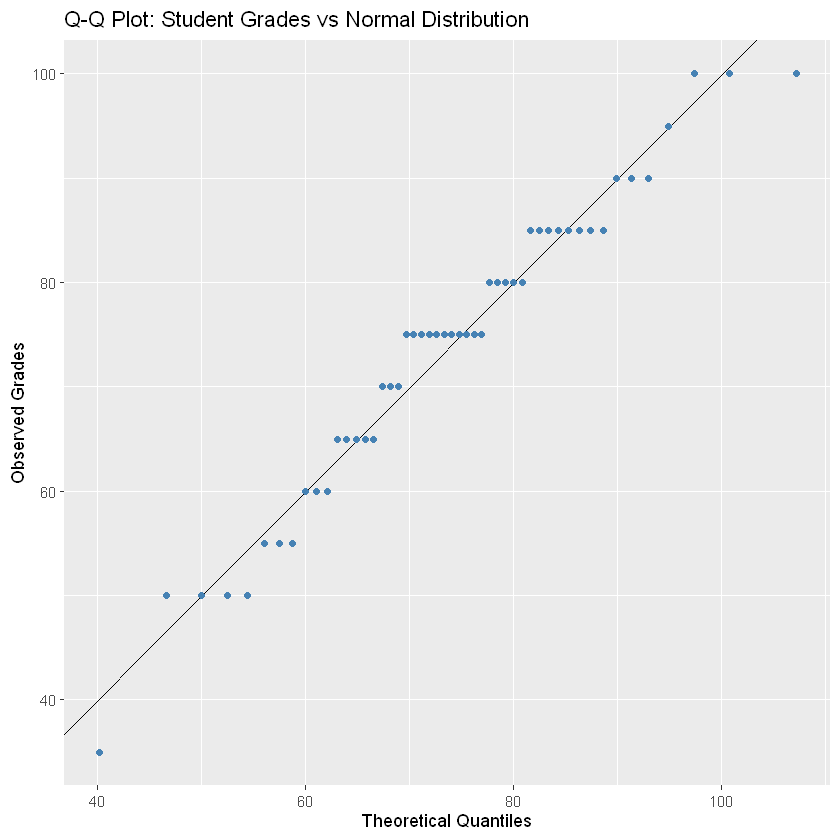

In [106]:
library(MASS)

params <- as.list(fitdistr(student_df$grade, "normal")$estimate)

ggplot(student_df, aes(sample = grade)) +
  geom_abline(slope = 1, intercept = 0, color = "black") +
  stat_qq(dparams = params, color = "steelblue") +
  scale_x_continuous(breaks = seq(0, 100, 20)) +
  scale_y_continuous(breaks = seq(0, 100, 20)) +
  labs(title = "Q-Q Plot: Student Grades vs Normal Distribution",
       x = "Theoretical Quantiles",
       y = "Observed Grades")


# Lecture 07: Visualizing Many Distributions
## Section 1: Why Visualize Many Distributions?

In many datasets, we want to understand **how a variable changes across groups**.

Examples:
- How does temperature vary month to month?
- How are grades distributed across different instructors?

### Key Concepts:
- You have one **response variable** (e.g., temperature)
- You have one or more **grouping variables** (e.g., month, class, gender)
- You want to **compare distributions**, not just means or medians

To do this, we’ll look at several techniques:
- Boxplots
- Violin plots
- Strip charts
- Sina plots
- Ridgeline plots


## Section 2: Violin Plots

A **violin plot** is a tool that combines the features of a boxplot with a full view of the distribution's shape.

### What it shows:
- The **width** of the violin at each point shows how many data values fall there.
- The **center** of the violin usually contains a boxplot for reference.
- The shape is created by a mirrored kernel density estimate (KDE).

### When to use it:
- When you want to see both **summary** and **distribution shape**
- Best used with **enough data per group**
- May be misleading with very few points


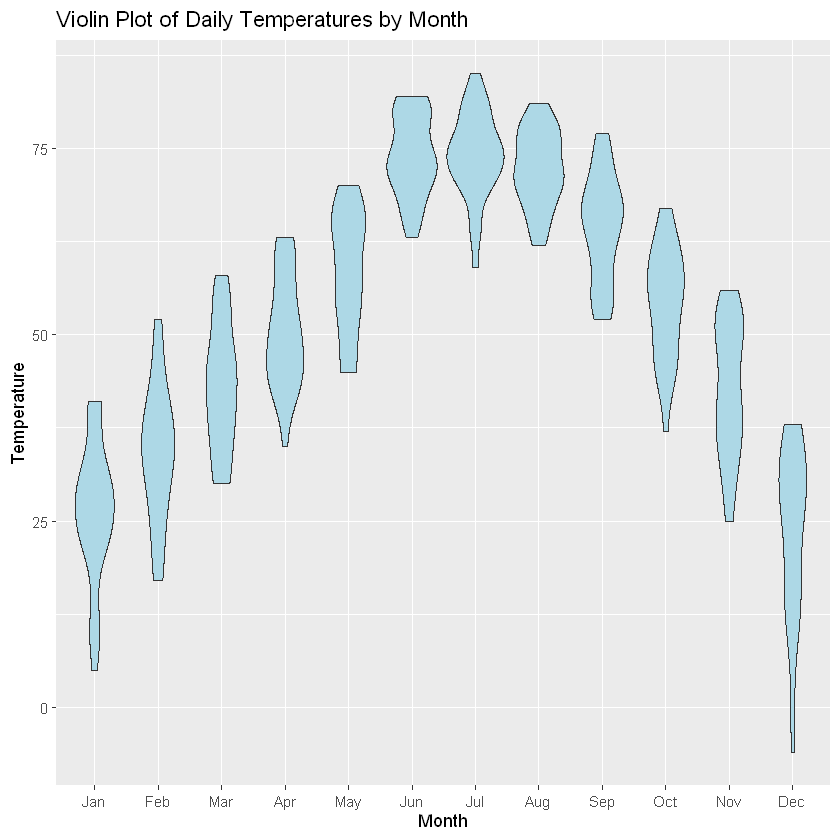

In [107]:
lincoln_df$month_short <- factor(lincoln_df$month_short, levels = unique(lincoln_df$month_short))

ggplot(lincoln_df, aes(x = month_short, y = Mean.Temperature..F.)) +
  geom_violin(fill = "lightblue") +
  labs(title = "Violin Plot of Daily Temperatures by Month",
       x = "Month", y = "Temperature")


### What to look for:
- **Wider areas** mean more days had those temperatures
- **Symmetry or skew** is easy to see in the shape
- **Thin violins** suggest fewer observations or tight clustering


## Section 3: Strip Charts (Jittered Points)

A **strip chart** shows each individual data point.

### Why use it?
- You want to see **all of the data**, not just a summary
- Useful when you don’t have too many points
- Helps reveal clustering, outliers, and repeated values

### Problem:
If many points share the same value, they can overlap.

### Solution:
We use **jittering** to slightly shift the points horizontally. This makes overlapping values easier to see.


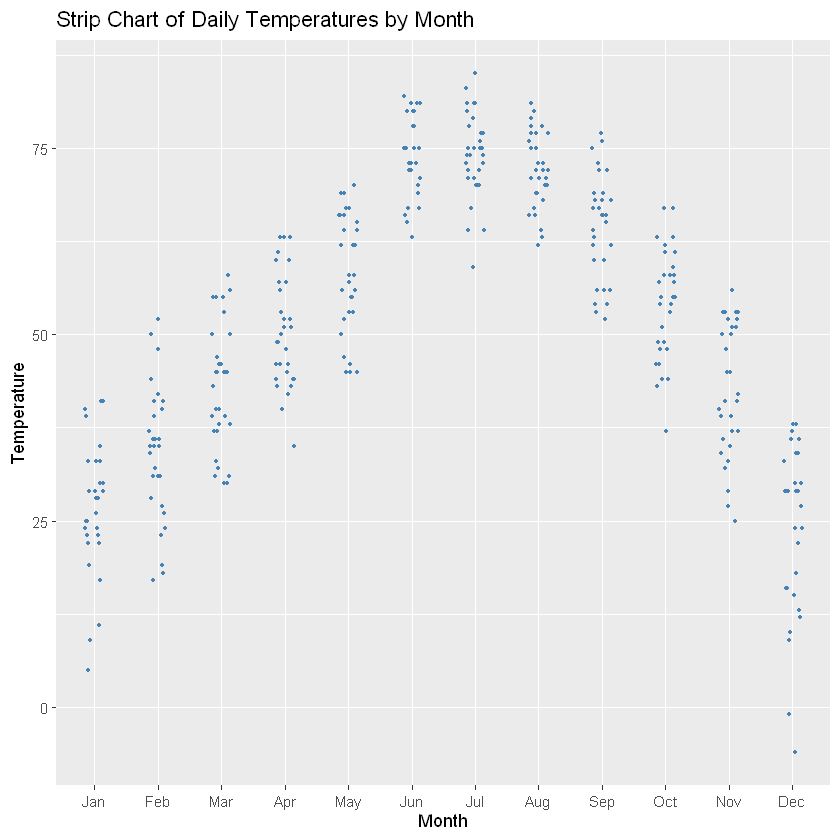

In [108]:
ggplot(lincoln_df, aes(x = month_short, y = Mean.Temperature..F.)) +
  geom_point(
    position = position_jitter(width = 0.15, height = 0, seed = 320),
    size = 0.8,
    color = "steelblue"
  ) +
  labs(title = "Strip Chart of Daily Temperatures by Month",
       x = "Month", y = "Temperature")


### What to look for:
- Each dot is one day of temperature data
- Vertical spread shows variation in temperature
- Clusters of dots show common temperatures
- Less abstract than violins or boxplots, but harder to read for large datasets


## Section 4: Sina Plots

**Sina plots** combine features of strip charts and violin plots.

### What they show:
- **Each individual point** is plotted (like a strip chart)
- But points are **spread horizontally** based on the local density (like a violin plot)

This gives you:
- The **full data**
- A **sense of shape** and density

Sina plots are especially useful when you want to show all points but also hint at the distribution.


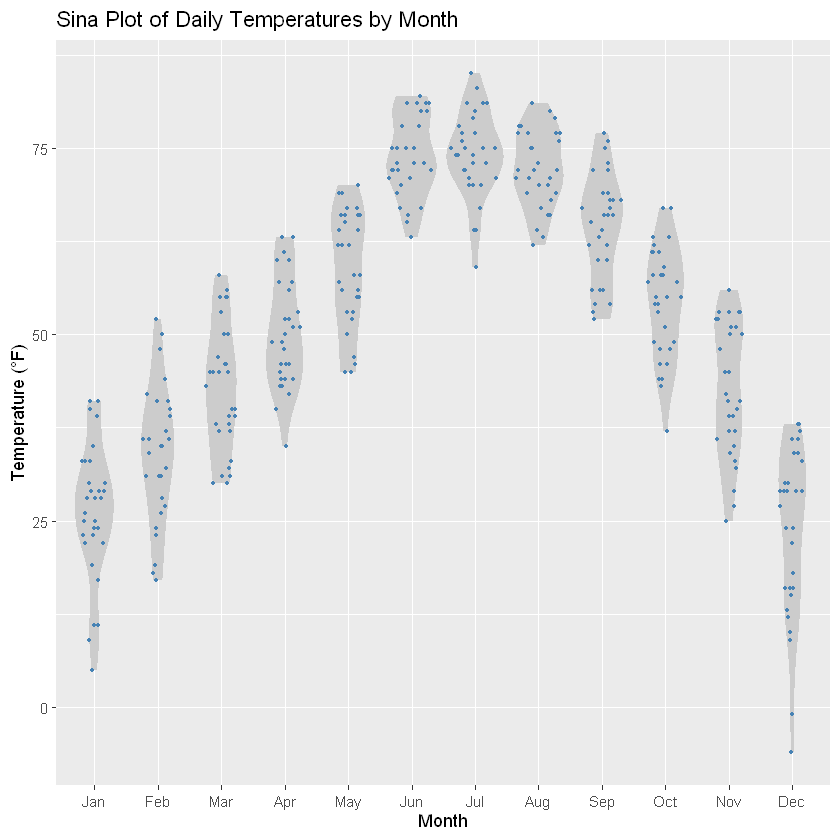

In [109]:
source("https://www.ics.uci.edu/~algol/teaching/informatics143w2021/claus_sina_stat.R")

ggplot(lincoln_df, aes(x = month_short, y = Mean.Temperature..F.)) +
  geom_violin(color = "transparent", fill = "gray80") +
  stat_sina(size = 0.8, color = "steelblue") +
  labs(title = "Sina Plot of Daily Temperatures by Month",
       x = "Month", y = "Temperature (°F)")


### Things to keep in mind:
- Like violins, sina plots are best when you have **enough data**
- Too few points → jitter may look random or misleading
- They are not built into `ggplot2` — you need to load a custom function


## Section 5: Boxplots

When you want to compare **distributions across groups** — for example, how temperatures vary across months — you need a way to show many distributions at once.

Both help you spot patterns across many groups quickly.


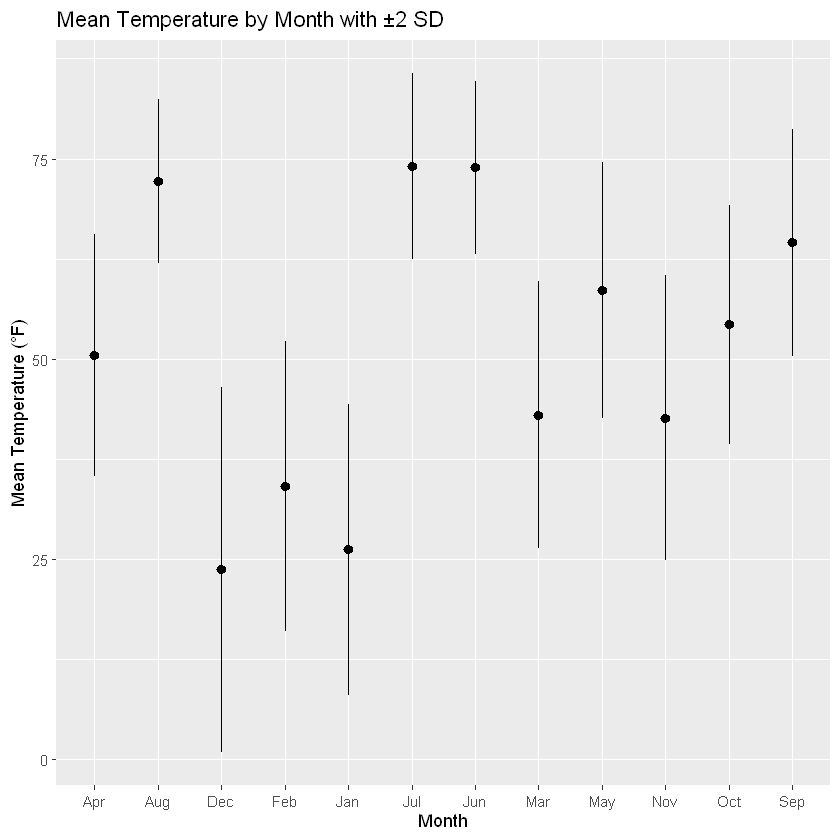

In [110]:
lincoln_df <- read.csv("https://www.ics.uci.edu/~algol/teaching/informatics143w2021/lincoln_df.csv")

ggplot(lincoln_df, aes(x = month_short, y = Mean.Temperature..F.)) +
  stat_summary(
    fun = mean,
    fun.min = function(x) mean(x) - 2 * sd(x),
    fun.max = function(x) mean(x) + 2 * sd(x),
    geom = "pointrange"
  ) +
  labs(title = "Mean Temperature by Month with ±2 SD", x = "Month", y = "Mean Temperature (°F)")


### What does this plot show?

- Each point is the **mean** temperature for that month
- The vertical line shows a rough **range**: 2 standard deviations above and below the mean
- This gives a quick idea of where most values fall

However, it **hides details**, like skew, outliers, whether or not the center point is the mean, median, or mode, or if the data is not symmetric.
That's where **boxplots** help.


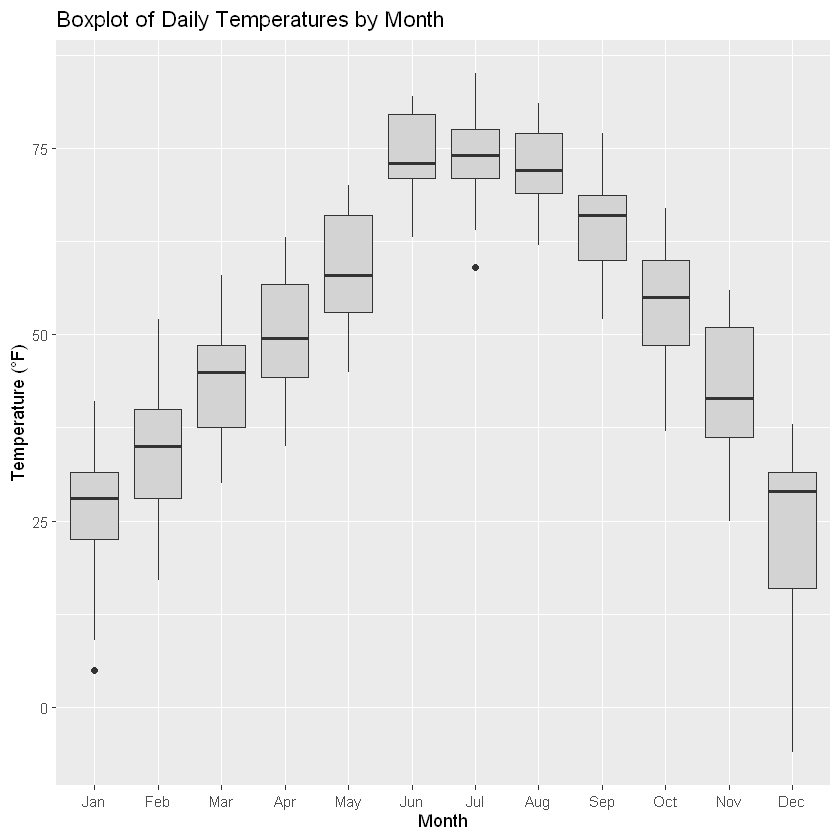

In [111]:
lincoln_df$month_short <- factor(lincoln_df$month_short, levels = unique(lincoln_df$month_short))

ggplot(lincoln_df, aes(x = month_short, y = Mean.Temperature..F.)) +
  geom_boxplot(fill = "lightgray") +
  labs(title = "Boxplot of Daily Temperatures by Month", x = "Month", y = "Temperature (°F)")


### What does a boxplot tell us?

- The **box** shows the middle 50% of temperatures (between Q1 and Q3)
- The **line inside the box** is the median
- The "whiskers" show typical range, and dots (if any) show outliers
- Boxplots are useful when comparing many groups side by side


## Section 6: Ridgeline Plots

**Ridgeline plots** are a way to stack multiple density curves on top of each other.

### What they show:
- Each group (e.g., each month) gets its own **horizontal density plot**
- These plots are **stacked** vertically with slight overlap
- No axis for height, you compare shapes **qualitatively**, not by precise values

### Why use them:
- Great for showing **trends across time** or ordered groups
- Can handle a **large number of distributions**
- Often used for temporal data, ratings, or grouped measurements


Picking joint bandwidth of 3.37



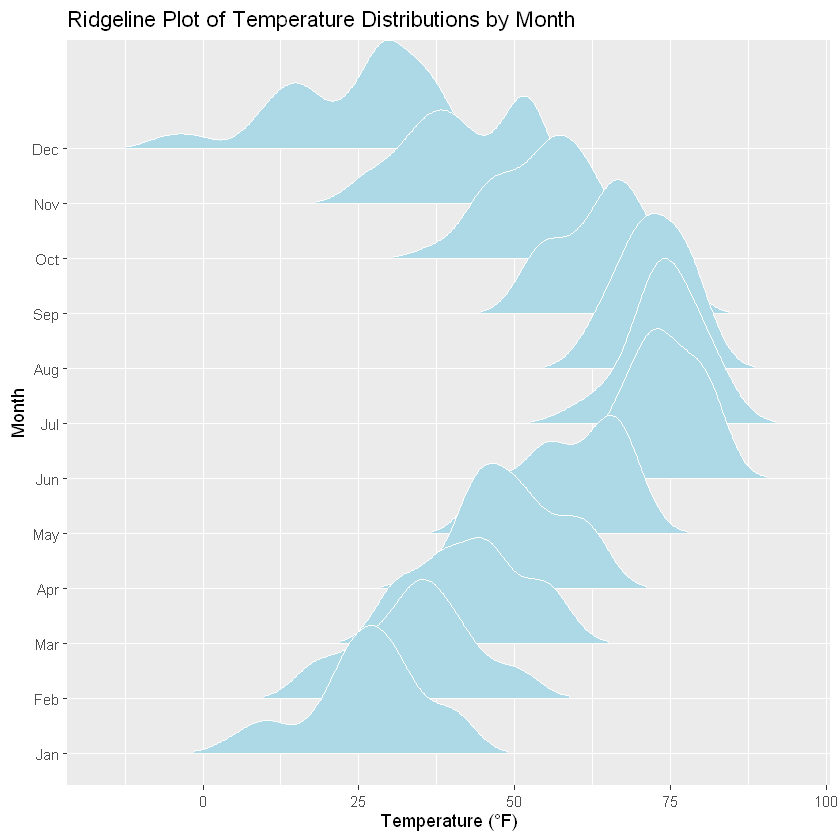

In [112]:
library(ggridges)

ggplot(lincoln_df, aes(x = Mean.Temperature..F., y = month_short)) +
  geom_density_ridges(
    scale = 3,
    rel_min_height = 0.01,
    fill = "lightblue",
    color = "white"
  ) +
  labs(title = "Ridgeline Plot of Temperature Distributions by Month",
       x = "Temperature (°F)", y = "Month")


### What to look for:
- Each ridge is a smoothed curve of daily temperatures for that month
- You can easily compare **shapes**, **peaks**, and **spread**
- The plot doesn't use height to show exact counts — it focuses on **overall patterns**

Ridgelines are especially useful for **exploring patterns over time**.
